<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**1.1. Откроем файлы и изучим их.**

In [2]:
path_full_1 = 'gold_recovery_full_new.csv'
path_full_2 = '/datasets/gold_recovery_full_new.csv'

path_train_1 = 'gold_recovery_train_new.csv'
path_train_2 = '/datasets/gold_recovery_train_new.csv'

path_test_1 = 'gold_recovery_test_new.csv'
path_test_2 = '/datasets/gold_recovery_test_new.csv'


# data_full
if os.path.exists(path_full_1):
    full = pd.read_csv(path_full_1)
elif os.path.exists(path_full_2):
    full = pd.read_csv(path_full_2)
else:
    print('Ой, что-то пошло не так!')
    
# data_train
if os.path.exists(path_train_1):
    train = pd.read_csv(path_train_1)
elif os.path.exists(path_train_2):
    train = pd.read_csv(path_train_2)
else:
    print('Ой, что-то пошло не так!')

# data_test
if os.path.exists(path_test_1):
    test = pd.read_csv(path_test_1)
elif os.path.exists(path_test_2):
    test = pd.read_csv(path_test_2)
else:
    print('Ой, что-то пошло не так!')

In [3]:
datasets = [train, test, full]
for dataset in datasets:
  print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
datasets = [train, test, full]
for dataset in datasets:
  display(dataset.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


**1.2 Проверим, что эффективность обогащения рассчитана правильно**

In [5]:
#Вычислим эффективность обогащения на обучающей выборке
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [6]:
#Cоздадим новый столбец для наших вычислений
train['recovery_calc'] = ((C*(F-T))/(F*(C-T)))*100
train['recovery_calc'].mean()

82.70450164550293

In [7]:
#Cравним с прзнаком rougher.output.recovery
train['rougher.output.recovery'].mean()

82.70450164550293

Значения нашего расчета равны с признаком 'rougher.output.recovery'. Поэтому можно предположить, что эффективность обогащения расчитана правильно.

Проверим наше предположение при помощи (MAE). Найдем среднюю абсолютную ошибку между нашими расчётами и значением признака.

In [8]:
print(mean_absolute_error(train['recovery_calc'], train['rougher.output.recovery']))

9.73512347450521e-15


Значение MAE близко к нулю, поэтому можно утверждать что расчеты верны.

In [9]:
#Удалим столбец
train.drop('recovery_calc', axis=1, inplace=True)

**1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?**

In [10]:
train.columns.difference(test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

От сюда следует что в тестовой выборке отсутствуют признаки которые относятся к вторичным стадиям обогащения, параметры продуктов, расчетные характеристики, относящиеся к разным этапам(final.output, primary_cleaner.output, rougher.calculations, rougher.output, secondary_cleaner.output)

**1.4. Проведем предобработку данных.**

In [11]:
#Проверим данные на пропуски
for dataset in datasets:
  display(dataset.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Заполним пропуски соответствующими значениями в следующем ряду методом ffill.

In [12]:
for dataset in datasets:
  dataset.ffill(axis='rows', inplace=True)

In [13]:
#Проверим наличие пропусков после обработки
for dataset in datasets:
  display(dataset.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [14]:
#Проверим данные на наличие дубликатов
for dataset in datasets:
  display(dataset.duplicated().sum())

0

0

0

Дубликатов не обнаружено

## Анализ данных

**2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишем выводы.**

In [15]:
#фильтруем даные серебра
data_ag = full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']]
#изменим названия колонок для удобства чтения
data_ag = data_ag.rename(columns={'rougher.input.feed_ag': 'input', 'rougher.output.concentrate_ag': 'rougher', 
                              'primary_cleaner.output.concentrate_ag': 'primary_cleaner', 
                              'final.output.concentrate_ag': 'final'})

In [16]:
#фильтруем даные свинца
data_pb = full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]
#изменим названия колонок для удобства чтения
data_pb = data_pb.rename(columns={'rougher.input.feed_pb': 'input', 'rougher.output.concentrate_pb': 'rougher', 
                              'primary_cleaner.output.concentrate_pb': 'primary_cleaner', 
                              'final.output.concentrate_pb': 'final'})

In [17]:
#фильтруем даные золота
data_au = full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]
#изменим названия колонок для удобства чтения
data_au = data_au.rename(columns={'rougher.input.feed_au': 'input', 'rougher.output.concentrate_au': 'rougher', 
                              'primary_cleaner.output.concentrate_au': 'primary_cleaner', 
                              'final.output.concentrate_au': 'final'})

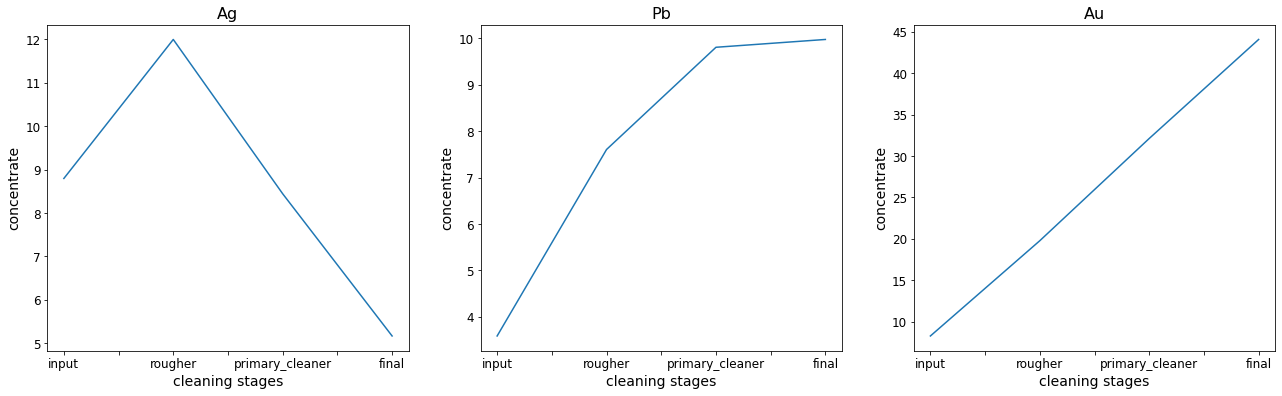

In [18]:
#построим графики изменения концентрации металлов на различных этапах очистки.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6))

data_ag.mean().plot(ax=ax1, subplots=True, fontsize=12)
ax1.set_title('Ag', fontsize=16)
ax1.set_ylabel('concentrate', fontsize=14)
ax1.set_xlabel('cleaning stages', fontsize=14)

data_pb.mean().plot(ax=ax2, subplots=True, fontsize=12)
ax2.set_title('Pb', fontsize=16)
ax2.set_ylabel('concentrate', fontsize=14)
ax2.set_xlabel('cleaning stages', fontsize=14)

data_au.mean().plot(ax=ax3, subplots=True, fontsize=12)
ax3.set_title('Au', fontsize=16)
ax3.set_ylabel('concentrate', fontsize=14)
ax3.set_xlabel('cleaning stages', fontsize=14)


plt.show()

Из графиков мы видим:

Количество серебра в отвалах резко повышается после флотации. Далее уменьшается на каждом этапе очистки.

Свинец резко повышает свою концентрацию на этапе флотации - первичной очистки, а потом идет плавное и не значительное повышение концентрации на этапе финальной очистки.

Золото возрастает прямопропорционально с каждым этапом очистки

**2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.**

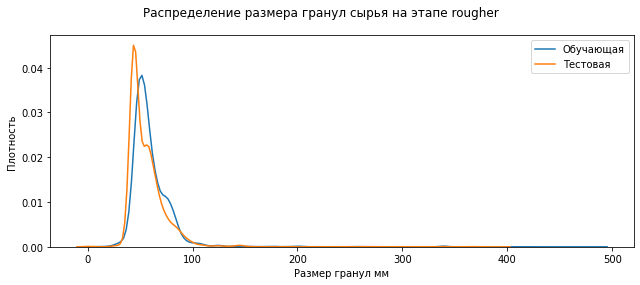

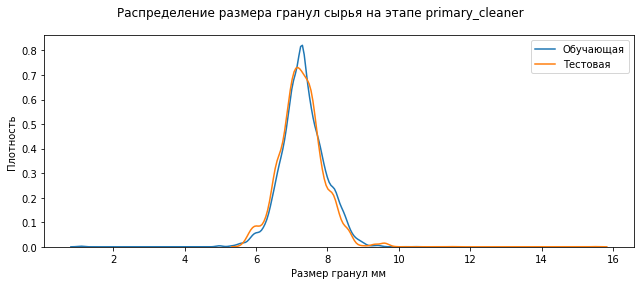

In [19]:
for stage in ['rougher', 'primary_cleaner']:
    
    fig = plt.figure(figsize=(9, 4), tight_layout=True)
    fig.suptitle(f'Распределение размера гранул сырья на этапе {stage}')
    column = stage + '.input.feed_size'

    sns.distplot(train[column], kde=True, hist=False)
    sns.distplot(test[column], kde=True, hist=False)
    
    plt.legend(['Обучающая', 'Тестовая'], loc='best')
    plt.xlabel('Размер гранул мм')
    plt.ylabel('Плотность')

Видим, что распределения размера гранул сырья на этапах в обучающей и тестовой выборках статистически значимо не различаются.

**2.3 Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [20]:
#Найдем суммарную концентрацию металлов (ag, pb, sol, au) в сырье
sum_r_feed = full[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)

In [21]:
sum_r_feed.head()

0    51.680034
1    50.659114
2    50.609929
3    51.061546
4    47.859163
dtype: float64

Text(0.5, 1.0, 'Суммарная концентрация металлов в сырье')

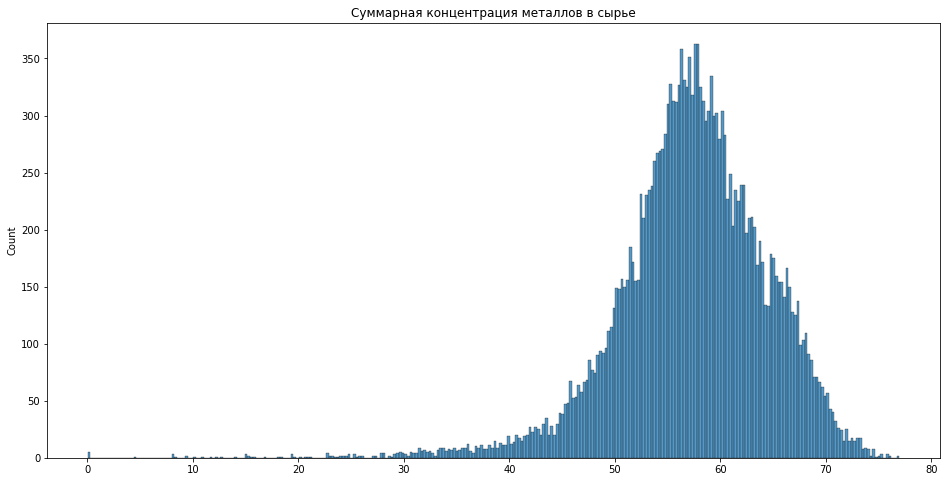

In [22]:
#Построим гистограмму для суммарной концентрации металлов в сырье
plt.subplots(figsize = (16,8))
sns.histplot(sum_r_feed, fill=True, bins=300, palette='coolwarm')
plt.title('Суммарная концентрация металлов в сырье')

In [23]:
#Найдем суммарную концентрацию металлов (ag, pb, sol, au) в черновом концентрате
sum_r_conc = full[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)

Text(0.5, 1.0, 'Суммарная концентрация металлов в черновом концентрате')

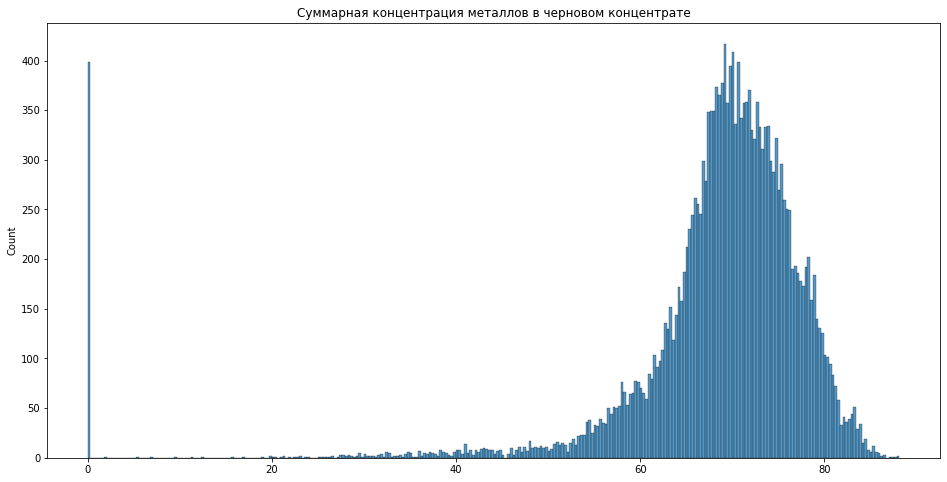

In [24]:
#Построим гистограмму для суммарной концентрации металлов в черновом концентрате
plt.subplots(figsize = (16,8))
sns.histplot(sum_r_conc, fill=True, bins=300, palette='coolwarm')
plt.title('Суммарная концентрация металлов в черновом концентрате')

In [25]:
#Найдем суммарную концентрацию металлов (ag, pb, sol, au) в финальном концентрате
sum_fin_conc = full[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)

Text(0.5, 1.0, 'Суммарная концентрация металлов в финальном концентрате')

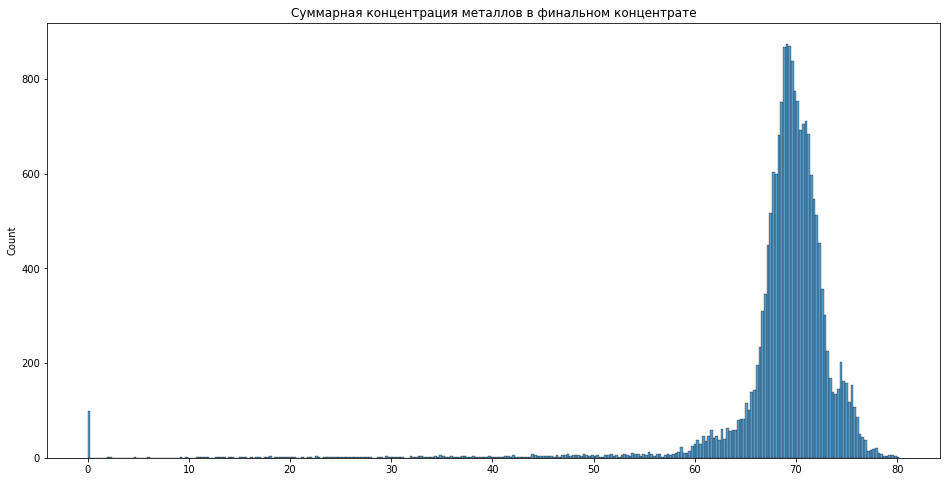

In [26]:
#Построим гистограмму для суммарной концентрации металлов в финальном концентрате
plt.subplots(figsize = (16,8))
sns.histplot(sum_fin_conc, fill=True, bins=300, palette='coolwarm')
plt.title('Суммарная концентрация металлов в финальном концентрате')

Во всех стадиях присутствуют аномальные нулевые значения суммарной концетрации. Мы могли бы их удалить, но поскольку в тестовой выборке содержатся только признаки для сырья в которых почти нет аномалий, это не имеет большого смысла.

Удалим аномальные значения 

In [27]:
train.shape

(14149, 87)

In [28]:
train = train[(train['rougher.output.concentrate_au'] != 0) & (train['rougher.output.concentrate_ag'] != 0) & (train['rougher.output.concentrate_pb'] != 0) & (train['rougher.output.concentrate_sol'] != 0)]
train = train[(train['final.output.concentrate_au'] != 0) & (train['final.output.concentrate_ag'] != 0) & (train['final.output.concentrate_pb'] != 0) & (train['final.output.concentrate_sol'] != 0)]


In [29]:
train.shape

(13792, 87)

## Модель

In [30]:
#Создадим датасет для целевых признаков, которых нет в тестовой выборке
data_target = full[['date', 'rougher.output.recovery', 'final.output.recovery']]
data_target.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [31]:
#Добавим их в тестовую выборку из полной
test = test.merge(data_target, how = 'left', on = 'date')

In [32]:
#Удалим столбец с датой и признаки которых нет в тестовой
test.drop(['date'], axis=1, inplace=True)
train = train.drop(set(train.columns)-set(test.columns), axis=1)

**3.1 Напишем функцию для вычисления итоговой sMAPE**

In [33]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [34]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

In [35]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

In [36]:
#Выделим признаки на тренировочной выборке для чернового концентрата (rougher)
features_train_rough = train.filter(regex='^rougher',axis=1)
features_train_rough = features_train_rough.drop(['rougher.output.recovery'], axis=1)
target_train_rough = train['rougher.output.recovery']

#Выделим признаки на тренировочной выборке для финального концентрата (final)
features_train_fin = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_fin = train['final.output.recovery']

#Выделим признаки на тестовой выборке для чернового концентрата (rougher)
features_test_rough = test.filter(regex='^rougher',axis=1)
features_test_rough = features_test_rough.drop(['rougher.output.recovery'], axis=1)
target_test_rough = test['rougher.output.recovery']

#Выделим признаки на тестовой выборке для финального концентрата (final)
features_test_fin = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_fin = test['final.output.recovery']

In [37]:
print('Размер features_train_rough:', features_train_rough.shape)
print('Размер target_train_rough:', target_train_rough.shape)

print('Размер features_train_fin:', features_train_fin.shape)
print('Размер target_train_fin:', target_train_fin.shape)

print('Размер features_test_rough:', features_test_rough.shape)
print('Размер target_test_rough:', target_test_rough.shape)

print('Размер features_test_fin:', features_test_fin.shape)
print('Размер target_test_fin:', target_test_fin.shape)

Размер features_train_rough: (13792, 22)
Размер target_train_rough: (13792,)
Размер features_train_fin: (13792, 52)
Размер target_train_fin: (13792,)
Размер features_test_rough: (5290, 22)
Размер target_test_rough: (5290,)
Размер features_test_fin: (5290, 52)
Размер target_test_fin: (5290,)


**3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишем выводы.**

In [38]:
#Проведем стандартизацию
feature_scaler = StandardScaler()
features_train_rough = feature_scaler.fit_transform(features_train_rough)
features_test_rough = feature_scaler.transform(features_test_rough)

In [39]:
features_train_rough = pd.DataFrame(features_train_rough)
features_train_rough

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.305743,-1.114223,0.467197,-0.206923,0.102835,-0.712365,0.088585,0.122362,0.134873,0.146067,...,1.537857,0.512805,1.415970,0.407295,1.845056,0.252659,1.704340,0.165074,2.160221,0.223195
1,-1.273616,-1.131537,0.484051,-0.129294,-0.109488,-0.716308,0.083827,0.120336,0.177846,0.151577,...,1.525458,0.247109,1.407032,0.270673,1.852667,0.276748,1.676232,0.246308,2.065364,0.255383
2,-1.297239,-1.229128,0.529815,-0.119245,-0.065574,-0.776940,0.068219,0.294970,0.157398,0.307732,...,1.517672,0.246148,1.403228,0.268455,1.849421,0.276738,1.675985,0.262796,2.068769,0.248167
3,-1.335932,-1.340845,0.651219,-0.107025,0.113629,-0.904099,-0.021408,0.300256,0.095978,0.301182,...,1.521639,0.235488,1.404832,0.269243,1.839255,0.273576,1.685429,0.261159,2.068302,0.261185
4,-1.326618,-1.570976,0.631328,-0.182639,-0.392337,-1.140916,-0.228837,0.296291,-0.101317,0.299815,...,1.522460,0.253278,1.406458,0.267024,1.848989,0.277536,1.688739,0.281550,2.073579,0.250289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13787,-1.310252,1.025067,0.828038,1.102662,0.215752,-1.311746,-1.214548,2.993836,-0.962215,2.707669,...,-0.952049,-0.604397,-1.198283,-0.599675,-1.276820,-0.607345,-1.268867,-0.608713,-1.070565,-0.581403
13788,-1.294664,0.591669,0.810091,2.565995,0.461590,-1.570845,-1.339832,3.127213,-1.143150,2.823017,...,-0.963766,-0.636107,-1.195444,-0.644816,-1.261827,-0.622991,-1.275029,-0.627725,-1.069111,-0.570326
13789,-1.374438,0.477043,0.777731,2.685703,0.759885,-1.734232,-1.577597,3.122341,-1.280994,2.824814,...,-0.951307,-0.655453,-1.190546,-0.637941,-1.247809,-0.664845,-1.272345,-0.631550,-1.066588,-0.748467
13790,-1.333381,0.369314,0.671910,2.749802,0.687424,-1.818791,-1.693569,3.120612,-1.381973,2.822424,...,-0.928535,-0.626138,-1.169773,-0.632357,-1.288795,-0.566275,-1.258552,-0.605636,-1.061513,-0.610998


In [40]:
features_test_rough = pd.DataFrame(features_test_rough)
features_test_rough

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.412018,1.959739,0.141046,0.106002,1.151932,2.204567,1.611512,0.254962,1.490944,0.263884,...,-0.403028,1.133655,-0.246784,1.174191,-0.072444,1.183594,-0.466051,1.154285,-0.501451,1.173649
1,2.363199,1.858266,0.144050,0.073544,0.984012,2.118524,1.636087,0.114208,1.525593,0.143218,...,-0.410408,1.119035,-0.247897,1.169997,-0.061825,1.175439,-0.463212,1.154983,-0.497836,1.039162
2,2.417225,1.767010,0.139349,0.287651,1.257339,2.208334,1.632998,-0.021053,1.521829,0.022287,...,-0.415653,1.113485,-0.254061,1.144136,-0.065350,1.160198,-0.463622,1.159484,-0.497150,1.126204
3,2.026889,1.481053,0.013732,-0.017219,0.958315,2.255368,1.490963,-0.065436,1.395995,-0.018319,...,-0.394326,1.141540,-0.243279,1.167921,-0.067127,1.219274,-0.452876,1.138251,-0.494784,1.144969
4,1.459253,1.162472,0.126112,0.132204,1.000362,1.791004,0.588583,-0.123632,0.623660,-0.070378,...,-0.101296,1.126611,0.020601,1.180390,0.168825,1.158647,-0.147905,1.163884,-0.500999,1.154257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,1.624054,1.096370,0.449212,0.281355,1.151849,1.407558,-0.490634,1.212347,-0.330365,1.115620,...,-1.502362,-0.626806,-1.651146,-0.621813,-1.728155,-0.594981,-1.259372,-0.627657,-1.060853,-0.621837
5286,1.464894,0.897426,0.531450,0.099514,0.965596,1.250979,-0.530648,1.209576,-0.365930,1.118698,...,-1.468995,-0.594991,-1.627916,-0.581597,-1.713561,-0.545353,-1.255971,-0.612751,-1.061608,-0.566042
5287,1.437290,0.830427,0.687131,0.579776,0.965416,1.206711,-0.468104,1.205347,-0.310238,1.116030,...,-1.512044,-0.618600,-1.665105,-0.620035,-1.709068,-0.624293,-1.263778,-0.613298,-1.067592,-0.600139
5288,1.439301,0.773714,0.697031,0.771197,1.090220,1.155678,-0.298822,1.208813,-0.164439,1.117785,...,-1.501481,-0.621936,-1.656590,-0.634816,-1.750602,-0.621143,-1.270217,-0.629336,-1.068758,-0.634966


In [41]:
dct_with_scores = {}

**Модель LinearRegression**

In [42]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_train_fin,
                          target_train_rough,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_train_fin,
                        target_train_fin,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 3 s, sys: 4.64 s, total: 7.64 s
Wall time: 7.63 s


**Модель DecisionTreeRegressor**

In [43]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=12345)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_train_fin,
                              target_train_rough,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=12345)
    smape_final = cross_val_score(model_dt_final, 
                                  features_train_fin,
                                  target_train_fin,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

CPU times: user 24.1 s, sys: 218 ms, total: 24.3 s
Wall time: 24.4 s


**Модель RandomForestRegressor**

In [44]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_train_fin,
                                  target_train_rough,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        smape_final = cross_val_score(model_rf_final,
                                features_train_fin,
                                target_train_fin,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

CPU times: user 13min 29s, sys: 1.62 s, total: 13min 31s
Wall time: 13min 34s


In [45]:
for key in dct_with_scores.keys():
    print(f'\n модель {str(key)} с результатом - {dct_with_scores[key][0]}')


 модель LR с результатом - 10.059261443482796

 модель DT с результатом - 8.925785452030949

 модель RF с результатом - 8.529258429567625


**Лучшая модель: RandomForestRegressor**

Получим лучшие параметры для данной модели

In [46]:
print('\nbest params for RandomForestRegressor: est - {}, depth - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))


best params for RandomForestRegressor: est - 10, depth - 4


**3.3 Проверим лучшую модель на тестовой выборке**

In [52]:
model_for_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=12345)
model_for_test_rougher.fit(features_train_rough, target_train_rough)
predicted_rougher = model_for_test_rougher.predict(features_test_rough)

model_for_test_final = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=12345)
model_for_test_final.fit(features_train_fin, target_train_fin)
predicted_final = model_for_test_final.predict(features_test_fin)

smape_for_test_rougher = get_smape(target_test_rough, predicted_rougher)
smape_for_test_final = get_smape(target_test_fin, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

print(f'\nSMAPE для тестовой выборки - {final_smape_for_test}')


SMAPE для тестовой выборки - 9.75033130300162


**3.4 Проверим модель на адекватность**

In [53]:
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train_rough, target_train_rough)
dummy_model_f.fit(features_train_fin, target_train_fin)
test_predictions_r = dummy_model_r.predict(features_test_rough)
test_predictions_f = dummy_model_f.predict(features_test_fin)

print('Итоговое sMAPE для DummyRegressor:',smape_total(
    target_test_rough, test_predictions_r, target_test_fin, test_predictions_f).mean())

NameError: name 'smape_total' is not defined

In [54]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_train_rough, target_train_rough)
dummy_regr_for_final.fit(features_train_fin, target_train_fin)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_test_rough)
dummy_predicted_final = dummy_regr_for_final.predict(features_test_fin)

smape_for_const_rougher = get_smape(target_test_rough, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_test_fin, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

print(f'\nПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')


ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.82146839182027


**Выводы**

В рамках предобработки данных проекта, изучены загруженные файлы.

Проверен расчёт эффективности обогащения. Вычислено значение MAE между данными и расчётными значениями эффективности. Полученные значения МАЕ близки к 0. Это означаем, что эффективность обогащения рассчитана правильно.

Проведена проверка на дубликаты. Обработаны пропуски.

Анализ концентрации металлов показал, что концентрация золота значительно увеличивается на каждом этапе обработки сырья. 

Построены графики распределения плотности значений размеров гранул на входе в этапы флотации и финальной очистки выборок train и test Сами распределения похожи, что говорит об однородности данных размеров сырья в выборках train и test

Исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Подготовлены датафреймы для прогнозирования features, target

Описана функция для вычисления итоговой sMAPE.

На данных train обучены модели линейной регрессии, дерева решений, а также случайного леса. Проведена оценка каждой модели. В результате для дальнешего прогнозирования выбирана модель случайного леса smape = 8.529 est=10, max_deph=4

Итоговый расчёт на тестовых данных выбранной модели случайного леса позволил получить прогноз целевых признаков концентрации золота для этапа флотации и финальной очистки с показателем smape равным 9.75

Проведена проверка модели на адекватность. Итоговая оценка smape константной модели на тестовых данных равна 9.82